## II- Practice Exercises: Apply your Plotly Skills to an Airline Dataset

The Reporting Carrier On-Time Performance Dataset contains information on approximately 200 million domestic US flights reported to the United States Bureau of Transportation Statistics. The dataset contains basic information about each flight (such as date, time, departure airport, arrival airport) and, if applicable, the amount of time the flight was delayed and information about the reason for the delay. This dataset can be used to predict the likelihood of a flight arriving on time.

Preview data, dataset metadata, and data glossary [here.](https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/data-preview/index.html)


# Read Data


In [21]:
# Read the airline data into pandas dataframe
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv'
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

airline_data =  pd.read_csv(text,
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [22]:
# Preview the first 5 lines of the loaded data 
airline_data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Shape of the data
airline_data.shape

(27000, 110)

In [24]:
# Randomly sample 500 data points. Setting the random state to be 42 so that we get same result.
data = airline_data.sample(n=500, random_state=42)

In [25]:
# Get the shape of the trimmed data
data.shape

(500, 110)

It would be interesting if we visually  capture details such as

* Departure time changes with respect to airport distance.

* Average Flight Delay time over the months

* Comparing number of flights in each destination state

* Number of  flights per reporting airline

* Distrubution of arrival delay

* Proportion of distance group by month (month indicated by numbers)

* Hierarchical view in othe order of month and destination state holding value of number of flights


# plotly.graph_objects¶


## 1. Scatter Plot


Let us use a scatter plot to represent departure time changes with respect to airport distance

This plot should contain the following

* Title as **Distance vs Departure Time**.
* x-axis label should be **Distance**
* y-axis label should be **DeptTime**
* **Distance** column data from the flight delay dataset should be considered in x-axis
* **DepTime** column data from the flight delay dataset should be considered in y-axis
* Scatter plot markers should be of red color


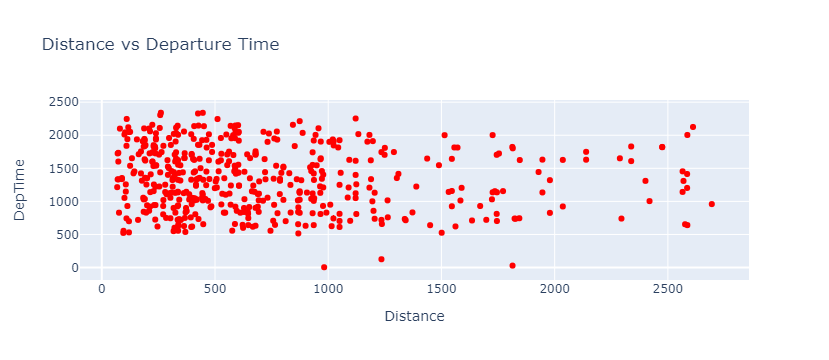

In [26]:
## Write your code here
fig=go.Figure()

fig.add_trace(go.Scatter(x=data['Distance'], y=data['DepTime'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Distance vs Departure Time', xaxis_title='Distance', yaxis_title='DepTime')

fig.show()

Double-click **here** for hint.
<!-- 
***Use go.scatter() method*** and mode as markers
-->


Double-click **here** for the solution.

<!-- The answer is below:

    
##First we will create an empty figure ising go.Figure()
fig=go.Figure()
#Next we will create a scatter plot by using the add_trace function and use the go.scatter() function within it
# In go.Scatter we define the x-axis data,y-axis data and define the mode as markers with color of the marker as red
fig.add_trace(go.Scatter(x=data['Distance'], y=data['DepTime'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Distance vs Departure Time', xaxis_title='Distance', yaxis_title='DepTime')
# Display the figure
fig.show()
-->


#### Inferences

It can be inferred that there are more flights round the clock for shorter distances. However, for longer distance there are limited flights through the day.


## 2. Line Plot


Let us now use a line plot to extract average monthly arrival delay time and see how it changes over the year.

  This plot should contain the following

* Title as **Month vs Average Flight Delay Time**.
* x-axis label should be **Month**
* y-axis label should be **ArrDelay**
* A new dataframe **line_data** should be created which consists of 2 columns average **arrival delay time per month** and **month** from the dataset
* **Month** column data from the line_data dataframe should be considered in x-axis
* **ArrDelay** column data from the ine_data dataframeshould be considered in y-axis
* Plotted line in the line plot should be of green color


In [27]:
# Group the data by Month and compute average over arrival delay time.
line_data = data.groupby('Month')['ArrDelay'].mean().reset_index()

In [28]:
# Display the data
line_data

,Month,ArrDelay
0,1,2.232558
1,2,2.687500
2,3,10.868421
3,4,6.229167
4,5,-0.279070
5,6,17.310345
6,7,5.088889
7,8,3.121951
8,9,9.081081
9,10,1.200000


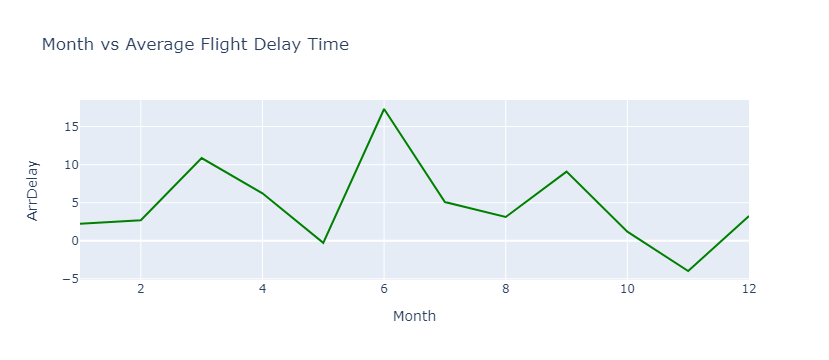

In [29]:
## Write your code here
fig=go.Figure()

fig.add_trace(go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
fig.show()

Double-click **here** for hint.
<!--
*   Hint: Scatter and line plot vary by updating mode parameter.
-->


Double-click **here** for the solution.

<!-- The answer is below:

    
##First we will create an empty figure ising go.Figure()
fig=go.Figure()
##Next we will create a line plot by using the add_trace function and use the go.scatter() function within it
# In go.Scatter we define the x-axis data,y-axis data and define the mode as lines with color of the marker as green
fig.add_trace(go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
# Create line plot here
## Here we update these values under function attributes such as title,xaxis_title and yaxis_title
fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
fig.show()
-->


#### Inferences

It is found that in the month of June the average monthly delay time is the maximum


# plotly.express¶


## 3. Bar Chart



Let us use a bar chart to extract number of flights from a specific airline that goes to a destination

This plot should contain the following

* Title as **Total number of flights to the destination state split by reporting air**.
* x-axis label should be **DestState**
* y-axis label should be **Flights**
* Create a new dataframe called **bar_data**  which contains 2 columns **DestState** and **Flights**.Here **flights** indicate total number of flights in each combination.


In [30]:
# Group the data by destination state and reporting airline. Compute total number of flights in each combination
bar_data = data.groupby('DestState')['Flights'].sum().reset_index()

In [31]:
# Display the data
bar_data

,DestState,Flights
0,AK,4.0
1,AL,3.0
2,AZ,8.0
3,CA,68.0
4,CO,20.0
5,CT,5.0
6,FL,32.0
7,GA,27.0
8,HI,5.0
9,IA,1.0


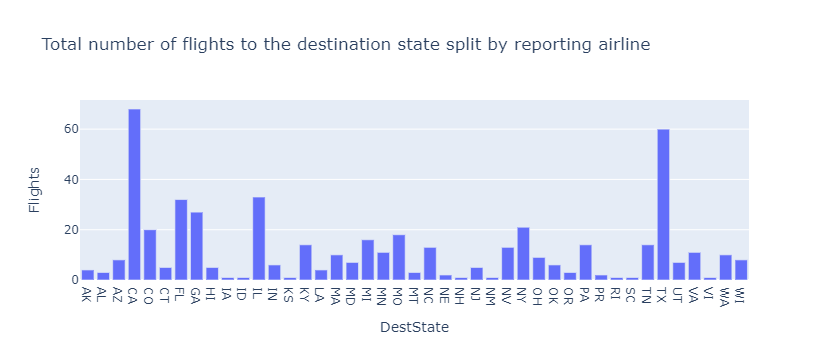

In [32]:
## Write your code here
fig = px.bar(bar_data, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 
fig.show()

Double-click **here** for hint.
<!--
***Use the px.bar() function***
-->


Double-click **here** for the solution.

<!-- The answer is below:

    
# Use plotly express bar chart function px.bar. Provide input data, x and y axis variable, and title of the chart.
# This will give total number of flights to the destination state.
fig = px.bar(bar_data, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 
fig.show()
-->


#### Inferences

It is found that maximum flights are to destination state **CA** which is around 68 and there is only 1 flight to destination state **VT**


## 4. Histogram



Let us represent the distribution of arrival delay using a histogram

This plot should contain the following

* Title as **Total number of flights to the destination state split by reporting air**.
* x-axis label should be **ArrayDelay**
* y-axis will show the count of arrival delay


In [33]:
# Set missing values to 0
data['ArrDelay'] = data['ArrDelay'].fillna(0)

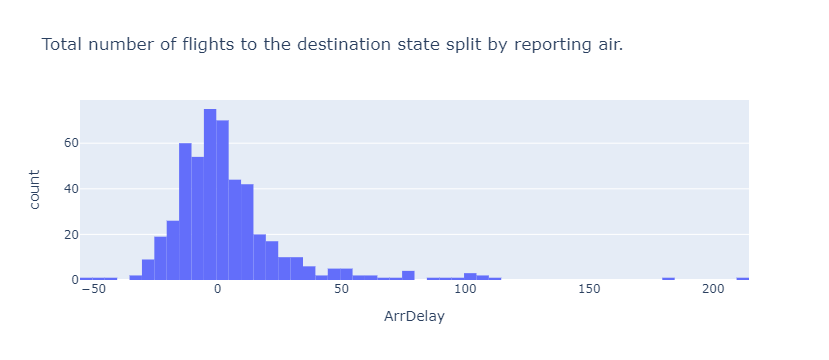

In [34]:
## Write your code here
fig = px.histogram(data, x="ArrDelay",title="Total number of flights to the destination state split by reporting air.")
fig.show()

Double-click **here** for hint.
<!--
***Use the px.histogram() function***
-->


Double-click **here** for the solution.

<!-- The answer is below:
## Use plotly express histogram chart function px.histogram.Provide input data x to the histogram
fig = px.histogram(data, x="ArrDelay",title="Total number of flights to the destination state split by reporting air.")
fig.show()
    

-->


#### Inferences

It is found that there is only max of 5 flights with an arrival delay of 50-54 minutes and around 17 flights with an arrival delay of 20-25 minutes


## 5. Bubble Chart


Let  use a bubble plot to represent number of flights as per reporting airline

This plot should contain the following

* Title as **Reporting Airline vs Number of Flights**.
* x-axis label should be **Reporting_Airline**
* y-axis label should be **Flights**
* size of the bubble should be **Flights** indicating number of flights
* Name of the hover tooltip to `reporting_airline` using `hover_name` parameter.


In [35]:
# Group the data by reporting airline and get number of flights
bub_data = data.groupby('Reporting_Airline')['Flights'].sum().reset_index()

In [36]:
bub_data

,Reporting_Airline,Flights
0,9E,5.0
1,AA,57.0
2,AS,14.0
3,B6,10.0
4,CO,12.0
5,DL,66.0
6,EA,4.0
7,EV,11.0
8,F9,4.0
9,FL,3.0


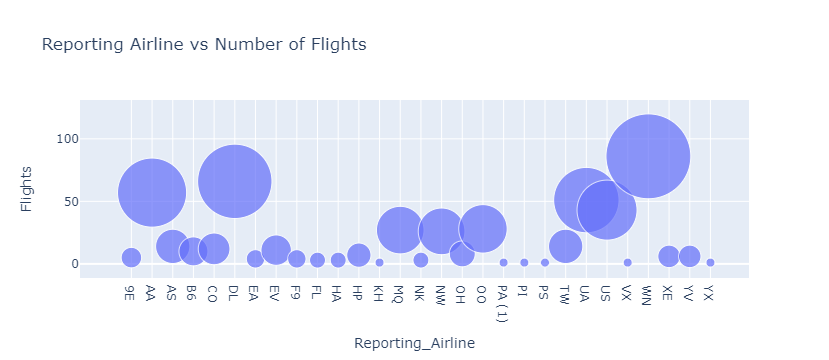

In [37]:
## Write your code here
fig = px.scatter(bub_data, x="Reporting_Airline", y="Flights", size="Flights",
                 hover_name="Reporting_Airline", title='Reporting Airline vs Number of Flights', size_max=60)
fig.show()

Double-click **here** for hint.
<!--
***Use the px.scatter() function and define the size attribute values apart from x and y attribute values***
-->


Double-click **here** for the solution.

<!-- The answer is below:
## Bubble chart using px.scatter function with x ,y and size variables defined.Title defined as Reporting Airline vs Number of Flights
fig = px.scatter(bub_data, x="Reporting_Airline", y="Flights", size="Flights",
                 hover_name="Reporting_Airline", title='Reporting Airline vs Number of Flights', size_max=60)
fig.show()
    

-->


#### Inferences

It is found that the reporting airline **WN** has the highest number of flights which is around 86


## 6. Pie Chart


Let us represent the proportion of Flights by Distance Group (Flights indicated by numbers)

This plot should contain the following

* Title as **Flight propotion by Distance Group**.
* values should be **Flights**
* names should be **DistanceGroup**


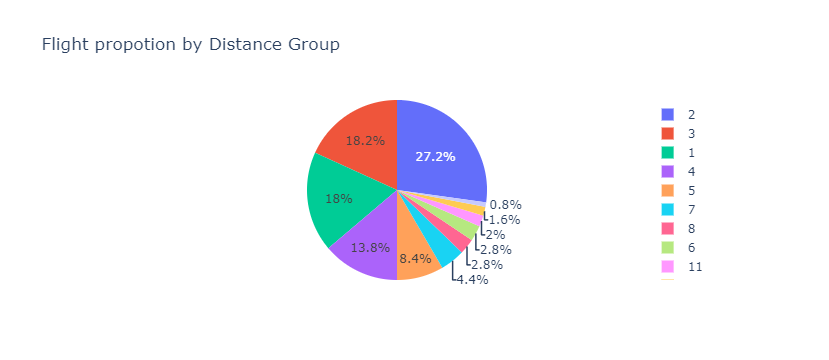

In [38]:
## Write your code here
fig = px.pie(data, values='Flights', names='DistanceGroup', title='Flight propotion by Distance Group')
fig.show()

Double-click **here** for hint.
<!--
***Use the px.pie() function***
-->


Double-click **here** for the solution.

<!-- The answer is below:
# Use px.pie function to create the chart. Input dataset. 
# Values parameter will set values associated to the sector. 'Flights' feature is passed to it.
# labels for the sector are passed to the `names` parameter.
fig = px.pie(data, values='Flights', names='DistanceGroup', title='Flight propotion by Distance Group')
fig.show()
    

-->


#### Inferences

It is found that Distance group 2 has the highest flight proportion.


## 7. SunBurst Charts


Let us represent the hierarchical view in othe order of month and destination state holding value of number of flights

This plot should contain the following

*  Define hierarchy of sectors from root to leaves in `path` parameter. Here, we go from `Month` to `DestStateName` feature.
*   Set sector values in `values` parameter. Here, we can pass in `Flights` feature.
*   Show the figure.
*   Title as **Flight Distribution Hierarchy**


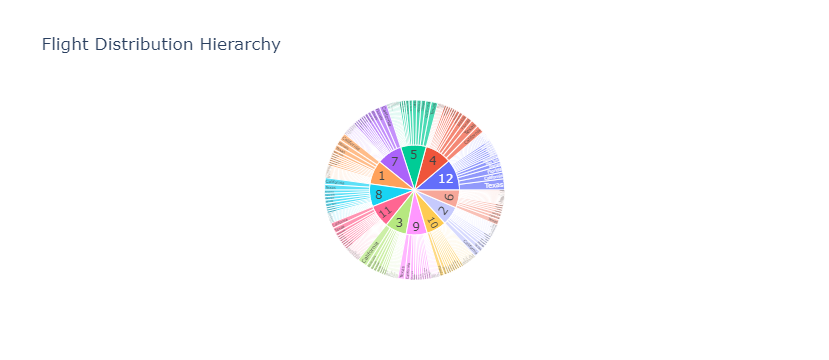

In [39]:
## Write your code here
fig = px.sunburst(data, path=['Month', 'DestStateName'], values='Flights',title='Flight Distribution Hierarchy')
fig.show()

Double-click **here** for hint.
<!--
***Use the px.sunburst() function***
-->


Double-click **here** for the solution.

<!-- The answer is below:
## Define path as Month and DestStateName and values as Flights.
fig = px.sunburst(data, path=['Month', 'DestStateName'], values='Flights',title='Flight Distribution Hierarchy')
fig.show()
    

-->


#### Inferences

Here the  **Month** numbers present in the innermost concentric circle is the root and for each month we will check the **number of flights** for the different **destination states** under it.


## Summary

Congratulations for completing your lab.

In this lab, you have learnt how to use `plotly.graph_objects` and `plotly.express` for creating plots and charts.


## Author(s)
[Saishruthi Swaminathan](https://www.linkedin.com/in/saishruthi-swaminathan/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2022-01-01)

Lakshmi Holla


## Other Contributor(s)

Lavanya T S


## Changelog

| Date       | Version | Changed by | Change Description                   |
| ---------- | ------- | ---------- | ------------------------------------ |
| 12-18-2020 | 1.0     | Nayef      | Added dataset link and upload to Git |
| 07-02-2023 | 1.1     | Lakshmi Holla     | Updated lab |


## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>
